In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

d:\anaconda3\envs\deepgcn\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
words = open('names.txt', 'r').read().splitlines()
words[:8]


['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [5]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

X, Y = [], []
for w in words:
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

n1 = int(0.8*len(X))
n2 = int(0.9*len(X))

Xtr, Ytr = X[:n1],Y[:n1]
Xdev, Ydev = X[n1:n2],Y[n1:n2]
Xte, Yte = X[n2:],Y[n2:]
Xtr.shape, Ytr.shape

(torch.Size([182516, 3]), torch.Size([182516]))

In [6]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [7]:
torch.manual_seed(0)
C = torch.randn(27,2,requires_grad=True)
W1 = torch.randn(6,100,requires_grad=True)
b1 = torch.randn(100,requires_grad=True)
W2 = torch.randn(100,27,requires_grad=True)
b2 = torch.randn(27,requires_grad=True)
parameters = [C,W1,b1,W2,b2]

# Sample Forward
# emb = C[X] # (32, 3, 2)
# h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
# logits = h @ W2 + b2 # (32, 27)
# loss = F.cross_entropy(logits, Y)
# for p in parameters:
#     p.grad = None
# loss.backward()
# for p in parameters:
#     p.data += -0.1 * p.grad


In [8]:
sum(p.nelement() for p in parameters) # number of parameters in total

3481

In [9]:
lre = torch.linspace(-3,0,1000)
lrs = 10**lre
lri = []
lossi = []
stepi = []


In [21]:
for i in range(10000):
    ix = torch.randint(0,Xtr.shape[0],(32,))
    emb = C[Xtr[ix]] # (32,3,2)
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) #(32,100)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits,Ytr[ix])
    for p in parameters:
        p.grad = None

    loss.backward()
    # lr = lrs[i]

    for p in parameters:
        p.data += -0.01 * p.grad
    
    # lri.append(lre[i])
    # lossi.append(loss.item())

print(loss.item())

2.311690092086792


In [22]:
emb = C[X[ix]] # (32,3,2)
h = torch.tanh(emb.view(-1,6) @ W1 + b1) #(32,100)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Y[ix])
print(loss.item())

2.2871034145355225


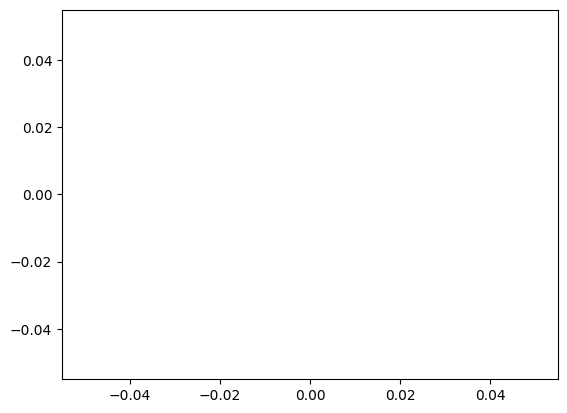

In [12]:
plt.plot(lri,lossi)

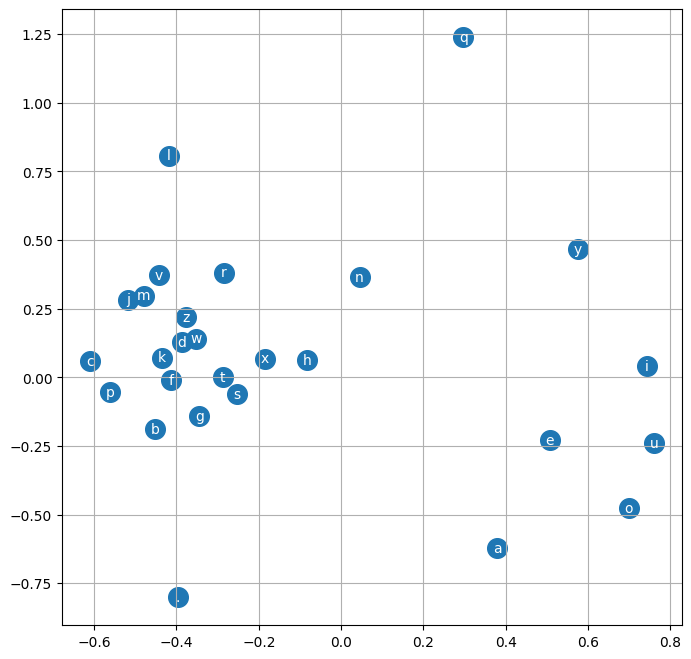

In [23]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [24]:
context = [0] * block_size
C[torch.tensor([context])].shape

torch.Size([1, 3, 2])

In [25]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

careah.
amelle.
khi.
mlex.
taty.
sacalene.
rahnen.
amery.
caigeni.
nelenia.
ceriiv.
kaleig.
hham.
pori.
quinn.
sroilea.
jadiqui.
jero.
dearyxi.
fhae.
